In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Sequential
import numpy as np

In [ ]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


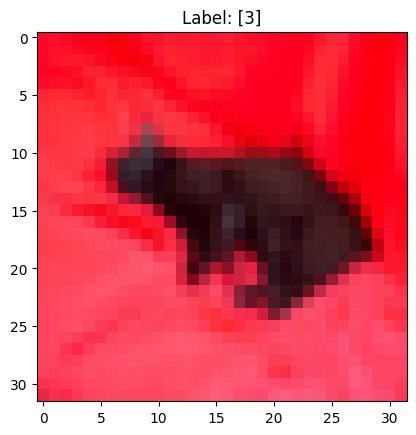

In [ ]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 10))
plt.imshow(X_train[21])  # Display the first image in X_train
plt.title(f"Label: {y_train[21]}")
plt.show()

In [ ]:
print(X_train[0][0][0])
print(X_train.shape)


[59 62 63]
(50000, 32, 32, 3)


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
)

In [ ]:
test_datagen=ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_data=train_datagen.flow(X_train,y_train,batch_size=32)

In [ ]:
test_data=test_datagen.flow(X_test,y_test,batch_size=32)

In [ ]:
print(type(train_data))

<class 'keras.src.legacy.preprocessing.image.NumpyArrayIterator'>


In [ ]:
for i in train_data:
    print(i[0].shape)
    print(i[1].shape)
    break

(32, 32, 32, 3)
(32, 10)


In [ ]:
model = Sequential()

# Input layer
model.add(Input(shape=(32, 32, 3)))

# First convolutional block
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

# Flattening layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", "precision", "recall", "f1_score"])
model.summary()
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 117ms/step - accuracy: 0.3084 - f1_score: 0.2996 - loss: 1.8717 - precision: 0.5278 - recall: 0.0752 - val_accuracy: 0.5423 - val_f1_score: 0.5287 - val_loss: 1.2763 - val_precision: 0.7532 - val_recall: 0.3134
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 178s 114ms/step - accuracy: 0.5111 - f1_score: 0.5055 - loss: 1.3658 - precision: 0.7087 - recall: 0.2946 - val_accuracy: 0.6223 - val_f1_score: 0.6144 - val_loss: 1.0575 - val_precision: 0.7706 - val_recall: 0.4526
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 182s 116ms/step - accuracy: 0.5846 - f1_score: 0.5814 - loss: 1.1872 - precision: 0.7506 - recall: 0.4004 - val_accuracy: 0.6631 - val_f1_score: 0.6541 - val_loss: 0.9705 - val_precision: 0.8020 - val_recall: 0.5123
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 115ms/step - accuracy: 0.6213 - f1_score: 0.6187 - loss: 1.0881 - precision: 0.7716 - recall: 0.4646 - val_accuracy: 0.6863 - val_f1_score: 0.6779 - val_loss: 0.8931 - val_precisi

In [ ]:

test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(test_data)

# Print the evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print("Test Recall is "+str(test_recall))
print("Test F1 Score is "+str(test_f1_score))


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7311 - f1_score: 0.7264 - loss: 0.7832 - precision: 0.8283 - recall: 0.6315
Test Loss: 0.7740
Test Accuracy: 0.7357
Test Precision: 0.8306
Test Recall is 0.6358000040054321
Test F1 Score is tf.Tensor(
[0.7796116  0.8617234  0.61751145 0.5314917  0.6768916  0.62572175
 0.751797   0.7777777  0.8606811  0.8246445 ], shape=(10,), dtype=float32)


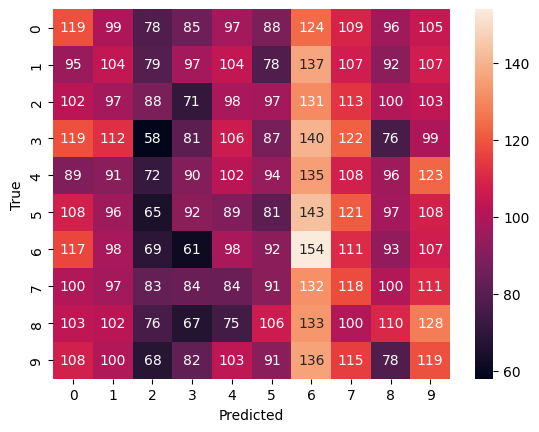

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()